# Partition Function for a Diatomic Ideal Gas

## Motivation

So far we have derived the partition function for a monatomic ideal gas and showed that this can be used to derive the ideal gas law, the average energy of an ideal gas, and the heat capacity of an ideal gas.  In the current notes we will see how the partition function changes when we consider a diatomic ideal gas.

## Learning Goals

After reading these notes, students should be able to: 

1. Identify the translational, electronic, rotational, and vibrational partition functions for a diatomic molecule.
2. Use the various molecular partition functions to compute associated quantities
3. Describe the meaning of $D_e$ in the context of a diatomic molecule
4. Repeat the derivations of the various partition functions.

## Coding Concepts

1. Variables
2. Functions
3. Arrays
4. Plotting with matplotlib

## Introduction

A diatomic molecule consists of two atoms and can be either homodiatomic (two of the same atoms) or heterodiatomic (two different atoms).  The energy of a diatomic ideal gas system can still be written a sum of molecular energies since there are no inter-molecular interactions
\begin{equation}
E_j = \sum_{i=1}^N \epsilon_{i,j}
\end{equation}
where $j$ denotes a specific energy level of the system and $\epsilon_{i,j}$ is the energy of molecule $i$ in system energy level $j$.

The separation of the total energy into a sum of molecular energies allows us to write the overall partition function as a product of molecular partition functions
\begin{equation}
Q = \frac{q^N}{N!},
\end{equation}
where we have assumed that all molecules are identical and indistinguishable.

The inclusion of a second atom in the molecule of the ideal gas adds additional degrees of freedom that can absorb energy.  The molecule can absorb energy in its single vibration or in its rotational degrees of freedom.  We will approximate the energy of a diatomic ideal gas as a sum of separate terms
\begin{equation}
\epsilon_{i,j} = \epsilon_{trans} + \epsilon_{elec} + \epsilon_{vib} + \epsilon_{rot},
\end{equation}
where $\epsilon_{trans}$ is the translational energy, $\epsilon_{elec}$ is the electronic energy, $\epsilon_{vib}$ is the vibrational energy, and $\epsilon_{rot}$ is the rotational energy.

The separation of energy into a sum of terms (an approximation - but a reasonable one) allows us to separate the molecular partition function into a product of terms
\begin{equation}
q = q_{trans}q_{elec}q_{vib}q_{rot}
\end{equation}

We will tackle each of these terms separately.

## Translational

The translation energy of a diatomic ideal gas is given as
\begin{equation}
\epsilon_{trans, n_x, n_y, n_z} = \frac{h^2}{8(m_1+m_2)a^2}\left(n_x^2 + n_y^2 + n_z^2\right),
\end{equation}
where $m_1$ is the mass of atom 1, $m_2$ is the mass of atom 2, $h$ is Planck's constant, $a=V^{1/3}$ is the linear box length, and $n_x$, $n_y$, and $n_z$ are the quantum numbers of the translational energy.  

We see that this equation is different from the translational energy for a monatomic particle only in the mass value.  Here, the mass is the sum of the mass of the two particles.  This does not change the overall form of the energy and thus the translational partition function will be similar to that of a monatomic particle.  We will not rederive if but will just provide it here
\begin{equation}
q_{trans} = \left( \frac{2\pi(m_1+m_2)k_BT}{h^2}\right)^{3/2}V
\end{equation}

## Electronic

We will only consider diatomic molecules in their ground electronic state but we still need to include a finite term for the electronic energy because define the zero of energy as that of the two separated atoms.  As the particles come together, the chemical bond between them will form via sharing of electrons.  This will release energy and thus we expect the "electronic" energy of the molecule to be lower than that of the two free atoms.

This equates to only considering the electronic energy to be a scalar quantity the value of which depends on the particular diatomic molecule.  
\begin{equation}
\epsilon_{elec} = -D_e 
\end{equation}
where $D_e$ is the dissociation energy of the diatomic molecule and is defined in the figure below.

Since there is only a single energy to account for, the molecular electronic partition function is
\begin{equation}
q_{elec} = g_{e,g} e^{\beta D_e},
\end{equation}
where $g_{e,g}$ is the degeneracy of the ground state electronic energy level.

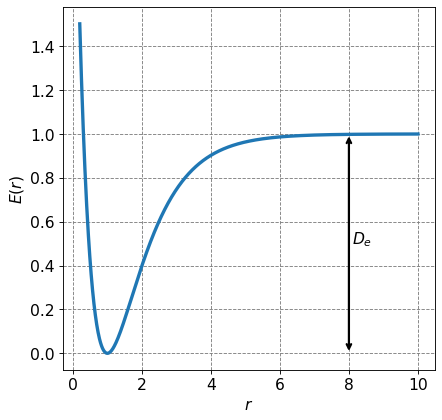

In [19]:
# Make a plot of a Morse potential for a diatomic molecule and label the dissociation energy
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# set parameters for Morse potential
De = 1.0
re = 1.0
a = 1.0
r = np.arange(0.2,10,0.01)

# define morse potential function
def morse(r, De, re, a):
    return De*(1-np.exp(-a*(r-re)))**2

# setup plot 
fontsize=14
fig = plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$r$",size=fontsize)
ax.set_ylabel("$E(r)$",size=fontsize)
# draw arrow for De
ax.annotate("",
            xy=(0.8*r[-1], 0.0), xycoords='data',
            xytext=(0.8*r[-1], De), textcoords='data',
            arrowprops=dict(lw=2,arrowstyle="<->"),
            )
# label arrow
ax.annotate("$D_e$", xy=(0.8*r[-1]+0.1, 0.5*De),fontsize=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
plt.plot(r,morse(r, De, re, a),lw=3)

## Rotational

The rotational energy of a diatomic molecule is given as
\begin{equation}
\epsilon_J = \frac{\hbar^2 J(J+1)}{2I} \quad J=0,1,2,...
\end{equation}
where $\hbar = \frac{h}{2\pi}$ is called reduced Planck's constant, $J$ is the rotational quantum number and $I $ is the moment of intertia of the molecule. Additionally, each rotational energy level has a degeneracy, denoted $g_J$, of
\begin{equation}
g_J = 2J+1.
\end{equation}

From the rotational energy and the degeneracy, we can write the molecular rotational partition function as 
\begin{equation}
q_{rot} = \sum_{J=0}^{\infty}(2J+1)e^{\frac{-\beta\hbar^2J(J+1)}{2I}}
\end{equation}

For convenience, we introduce a new variable, $\Theta_{rot}$, called the *rotational temperature* as
\begin{equation}
\Theta_{rot} = \frac{\hbar^2}{2Ik_B} = \frac{hB}{k_B},
\end{equation}
where $B=\frac{h}{8\pi^2I}$.   Using this variable simplifies the rotational p.f. to
\begin{equation}
q_{rot} = \sum_{J=0}^{\infty}(2J+1)e^{\frac{-\Theta_{rot}J(J+1)}{T}}
\end{equation}

To calculate this sum, we will use an integral to approximate it.  This is not as good of an approximation as for the translational p.f. because the rotational energy levels are not as closely spaced as the translational energy levels.  That said, it is still a fairly good approximation (stated without evidence).

\begin{eqnarray}
q_{rot}(T) &=& \int_0^\infty(2J+1)e^{\frac{-\Theta_{rot}J(J+1)}{T}}dJ \\
&=& \int_0^\infty e^{\frac{-\Theta_{rot}u}{T}}du
\end{eqnarray}
where I have made a $u$ substitution in the last step ($u=J(J+1)$ and $du=(2J+1)dJ$).  This integral can be looked up and you get
\begin{eqnarray}
q_{rot}(T) &=& \int_0^\infty e^{\frac{-\Theta_{rot}u}{T}}du \\
&=& \frac{T}{\Theta_{rot}} \\
&=& \frac{8\pi^2Ik_BT}{h^2}
\end{eqnarray}

## Vibrational

The vibrational energy of a diatomic molecule can be approximated as a single quantum harmonic oscillator the energy for which can be expressed as
\begin{equation}
\epsilon_\nu = \left(v+\frac{1}{2}\right)h\nu \quad v=0,1,2,...
\end{equation}
where $\nu = \frac{\sqrt{\frac{k}{\mu}}}{2\pi}$ is the vibrational frequency of the oscillator with spring force constant $k$ and reduced mass $\mu$ and $v$ is the vibrational quantum number.  Notice that, confusingly, there is both a $v$ (the quantum number) and $\nu$ in the equation above.

From this we get that the vibrational partition function is
\begin{eqnarray}
q_{vib}(T) &=& \sum_v e^{-\beta \left(v+\frac{1}{2}\right)h\nu} \\
   &=& e^{-\beta \frac{1}{2}h\nu} \sum_v e^{-\beta vh\nu}
\end{eqnarray}

Unlike the translational and rotational p.f.s, here we don't need to approximate this sum using an integral.  Instead, we will employ the concept of a convergent geometric series
\begin{equation}
\sum_{n=0}^\infty x^n = \frac{1}{1-x} \quad for \quad x<1
\end{equation}
The $x$ in our equation is $e^{-\beta vh\nu}$ which will be strictly less than one.  Thus we get
\begin{equation}
\sum_v e^{-\beta vh\nu} = \frac{1}{1-e^{-\beta h\nu}}
\end{equation}

Plugging this back into the equation for $q_{vib}$ yields
\begin{equation}
q_{vib}(T) = \frac{e^{-\beta \frac{1}{2}h\nu}}{1-e^{-\beta h\nu}}
\end{equation}

We can again 'simplify' this expression by introducing the concept of a vibrational temperature, $\Theta_{vib} = \frac{h\nu}{k_B}$ to get

\begin{equation}
q_{vib}(T) = \frac{e^{-\frac{\Theta_{vib}}{2T}}}{1-e^{-\frac{\Theta_{vib}}{T}}}
\end{equation}


## Combined Partition Function

The combined molecular partition function for a diatomic molecule is
\begin{eqnarray}
q &=& q_{trans}q_{elec}q_{rot}q_{vib} \\
&=& \left( \frac{2\pi(m_1+m_2)k_BT}{h^2}\right)^{3/2}V\cdot g_{e,g} e^{\beta D_e}\cdot \frac{T}{\Theta_{rot}} \cdot \frac{e^{-\frac{\Theta_{vib}}{2T}}}{1-e^{-\frac{\Theta_{vib}}{T}}} 
\end{eqnarray}